In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [10]:
values = np.array(pd.read_csv("data2.csv"))
x = values[:,0].reshape(-1,1)
y = values[:,1].reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(x,y)

In [11]:
gbrt = GradientBoostingRegressor(max_depth=1,warm_start=True)

min_val_error = float("inf")
error_going_up = 0

for n_estimator in range(1,120):
    gbrt.n_estimator = n_estimator
    gbrt.fit(X_train,y_train.ravel())
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_pred.ravel(),y_test.ravel())
    if(val_error < min_val_error):
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up > 5:
            break

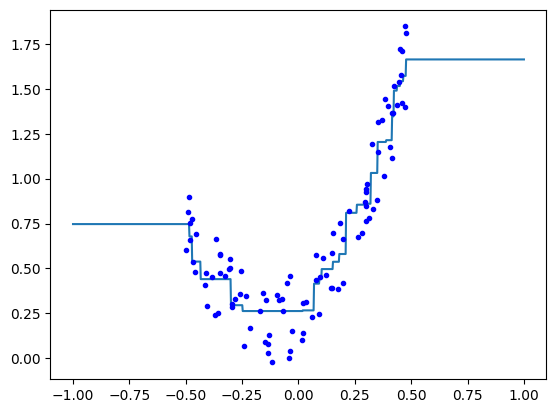

In [12]:
X_new = np.linspace(-1,1,1000).reshape(-1,1)
y_new = gbrt.predict(X_new).reshape(-1,1)
plt.plot(X_new,y_new)
plt.plot(x,y,"b.")
plt.show()